In [571]:
import pandas as pd
import numpy as np
import seaborn as sns


In [572]:
df = pd.read_excel('/Users/bhumeshpanchal/Documents/Bhumesh/Mtech/Python_learn/laptop-price-predictor-regression-project-main/new_lap.xlsx')

In [573]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [574]:
df.shape


(1302, 12)

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1302 non-null   int64  
 1   Company           1302 non-null   object 
 2   TypeName          1302 non-null   object 
 3   Inches            1302 non-null   float64
 4   ScreenResolution  1302 non-null   object 
 5   Cpu               1302 non-null   object 
 6   Ram               1302 non-null   object 
 7   Memory            1302 non-null   object 
 8   Gpu               1302 non-null   object 
 9   OpSys             1302 non-null   object 
 10  Weight            1302 non-null   object 
 11  Price             1302 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.2+ KB


In [576]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [577]:
df.duplicated().sum()

0

In [578]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [579]:
df.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [580]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [581]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')


In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1302 non-null   object 
 1   TypeName          1302 non-null   object 
 2   Inches            1302 non-null   float64
 3   ScreenResolution  1302 non-null   object 
 4   Cpu               1302 non-null   object 
 5   Ram               1302 non-null   int32  
 6   Memory            1302 non-null   object 
 7   Gpu               1302 non-null   object 
 8   OpSys             1302 non-null   object 
 9   Weight            1302 non-null   float32
 10  Price             1302 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.8+ KB


/var/folders/c9/8t42c60d22d2m1m_z6lc5_z00000gn/T/ipykernel_1535/3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

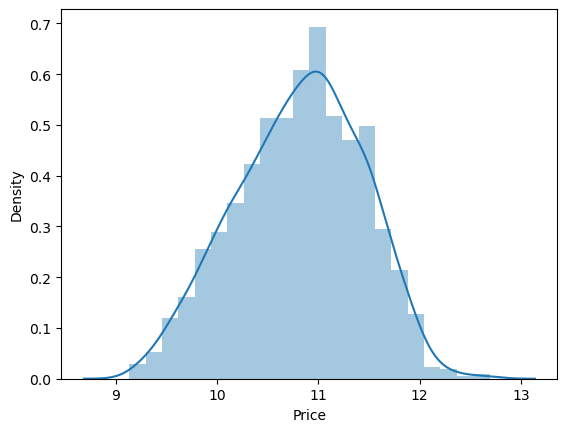

In [583]:
sns.distplot(np.log(df['Price']))

<Axes: xlabel='Company'>

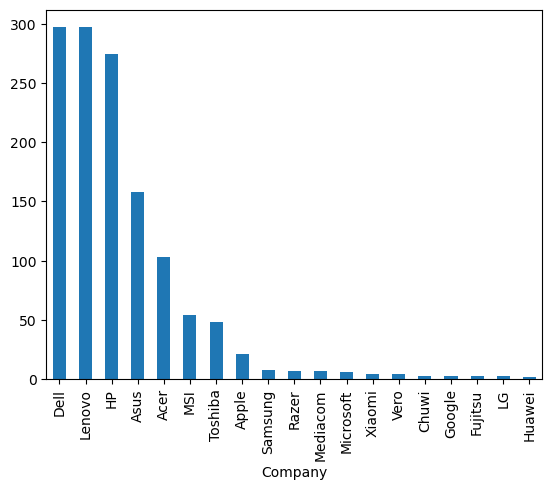

In [584]:
df['Company'].value_counts().plot(kind='bar')

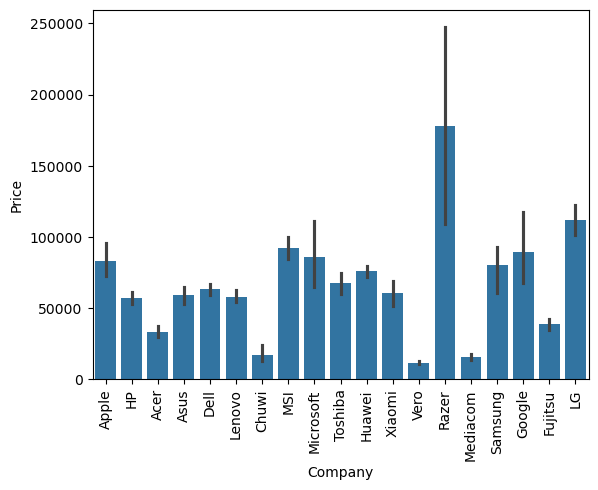

In [585]:
import matplotlib.pyplot as plt
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()


<Axes: xlabel='TypeName'>

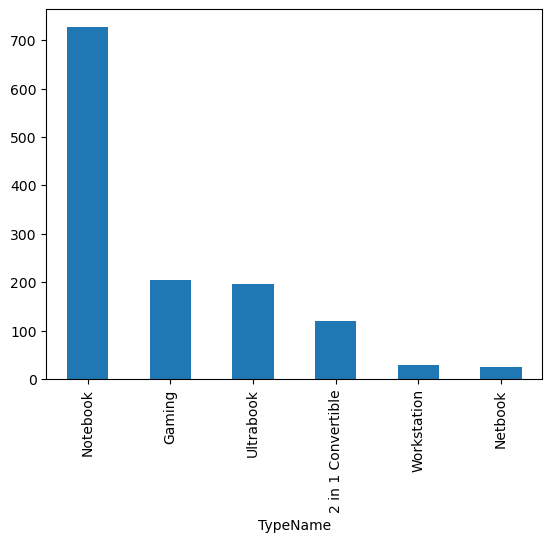

In [586]:
df['TypeName'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

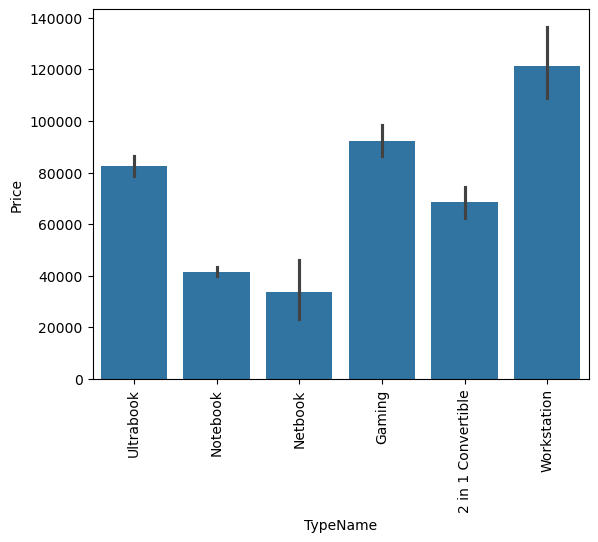

In [587]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')

/var/folders/c9/8t42c60d22d2m1m_z6lc5_z00000gn/T/ipykernel_1535/1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

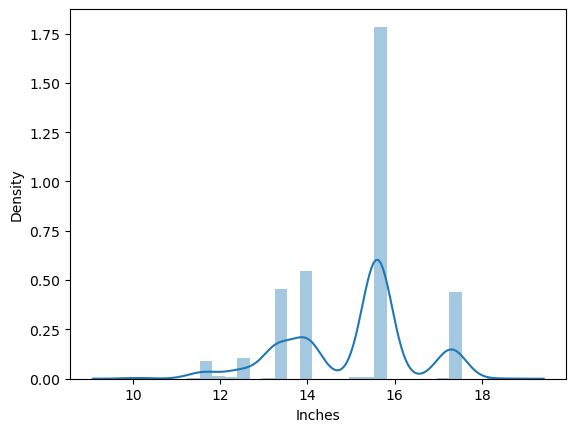

In [588]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

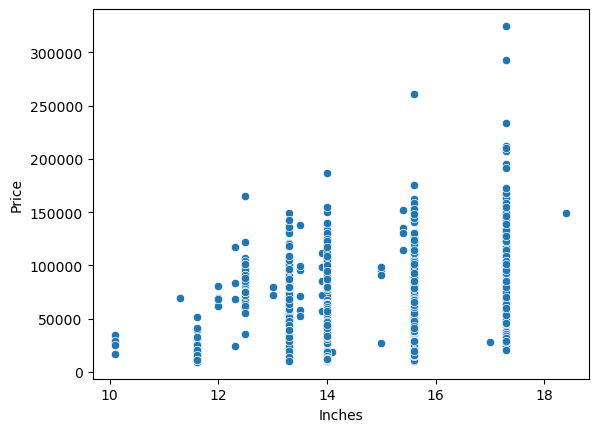

In [589]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [590]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [591]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [592]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
888,Acer,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,15824.1600,0
1070,Dell,Notebook,15.6,1366x768,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.06,25679.8944,0
775,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,2TB HDD,Nvidia GeForce 940MX,Windows 10,2.30,44701.9200,1
101,HP,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,Windows 10,2.10,18594.7200,0
532,Asus,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.00,69210.7200,0
131,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M430,Windows 10,2.20,23922.7200,0
1233,Apple,Ultrabook,11.6,1366x768,Intel Core i5 1.6GHz,4,256GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.08,51095.5200,0
257,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,1TB HDD,Nvidia GeForce MX150,Windows 10,2.90,56423.5200,0
524,Dell,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,2.80,47365.9200,0
198,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.35,73473.1200,0


In [593]:
df['Touchscreen'].value_counts()

Touchscreen
0    1111
1     191
Name: count, dtype: int64

<Axes: xlabel='Touchscreen', ylabel='Price'>

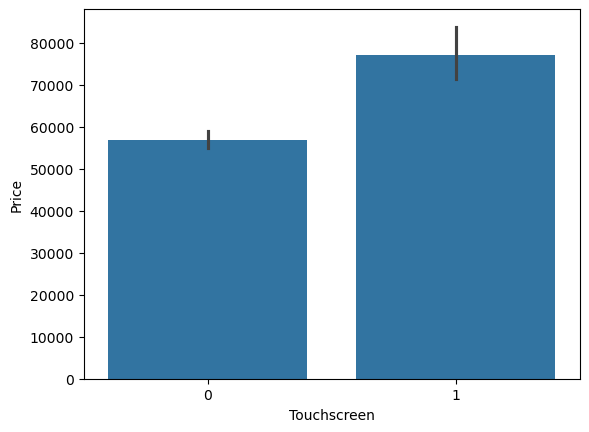

In [594]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [595]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [596]:
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips', ylabel='Price'>

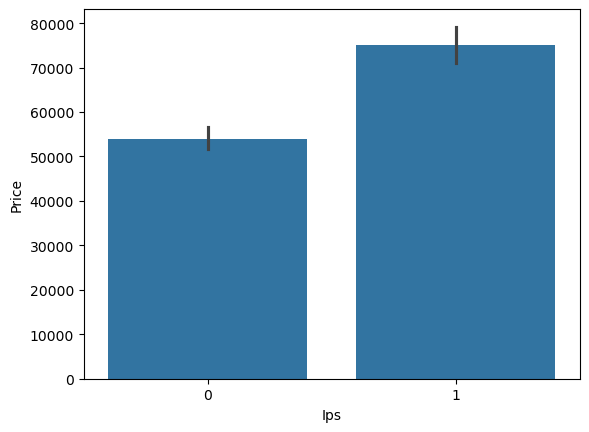

In [597]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [598]:
new= df['ScreenResolution'].str.split('x',n=1,expand=True)

In [599]:
df['X_res']=new[0]
df['Y_res']=new[1]

In [600]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [601]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [602]:
#df.drop(columns=['X_resn'],inplace=True)

In [603]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [604]:
df['X_res']=df['X_res'].astype('int32')
df['Y_res']=df['Y_res'].astype('int32')

In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1302 non-null   object 
 1   TypeName          1302 non-null   object 
 2   Inches            1302 non-null   float64
 3   ScreenResolution  1302 non-null   object 
 4   Cpu               1302 non-null   object 
 5   Ram               1302 non-null   int32  
 6   Memory            1302 non-null   object 
 7   Gpu               1302 non-null   object 
 8   OpSys             1302 non-null   object 
 9   Weight            1302 non-null   float32
 10  Price             1302 non-null   float64
 11  Touchscreen       1302 non-null   int64  
 12  Ips               1302 non-null   int64  
 13  X_res             1302 non-null   int32  
 14  Y_res             1302 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.4+ KB


In [606]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [607]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [608]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [609]:
df.drop(columns=['Inches'],inplace=True)

In [610]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i5 2.9GHz               1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v5 2.9GHz      1
Name: count, Length: 117, dtype: int64

In [611]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [612]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


In [613]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [614]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [615]:
df.head(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5
5,Acer,Notebook,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,1366,768,100.454670,AMD A9-Series 9420,AMD Processor
6,Apple,Ultrabook,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,2880,1800,220.534624,Intel Core i7,Intel Core i7
7,Apple,Ultrabook,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5
8,Asus,Ultrabook,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,1920,1080,157.350512,Intel Core i7,Intel Core i7
9,Acer,Ultrabook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,1920,1080,157.350512,Intel Core i5,Intel Core i5


In [616]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [617]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

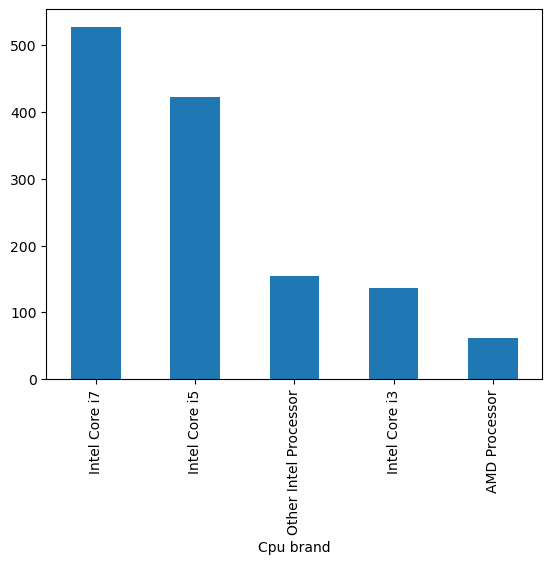

In [618]:
df['Cpu brand'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

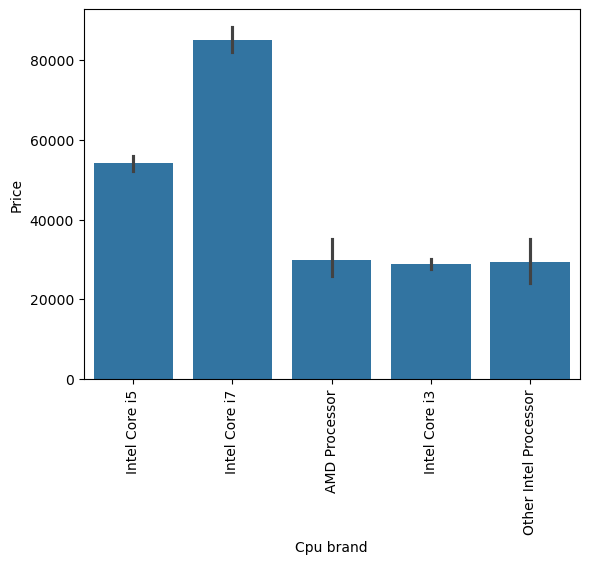

In [619]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')

In [620]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [621]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


<Axes: xlabel='Ram', ylabel='count'>

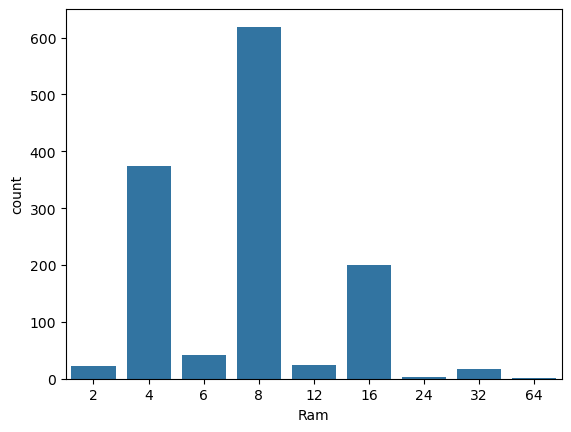

In [622]:
sns.barplot(df['Ram'].value_counts())

<Axes: xlabel='Ram', ylabel='Price'>

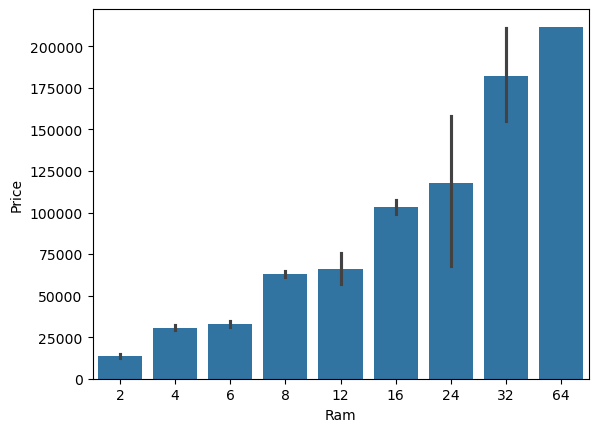

In [623]:
sns.barplot(x=df['Ram'],y=df['Price'])

In [624]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [625]:
df['SSD'] = df['Memory'].apply(lambda x: x.split('SSD')[0].split('GB')[0] if 'SSD' in x else 0)


df['HDD'] = df['Memory'].apply(lambda x: x.split('HDD')[0].split('TB')[0].split( )[-1] if 'HDD' in x else 0)


df['Flash'] = df['Memory'].apply(lambda x: x.split('Flash')[0].split('GB')[0] if 'Flash' in x else 0)


df['Hybrid'] = df['Memory'].apply(lambda x: x.split('Hybrid')[0].split('GB')[0] if 'Hybrid' in x else 0)

In [626]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi,Cpu brand,SSD,HDD,Flash,Hybrid
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,128,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,256,0,0,0


In [627]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Memory       1302 non-null   object 
 4   Gpu          1302 non-null   object 
 5   OpSys        1302 non-null   object 
 6   Weight       1302 non-null   float32
 7   Price        1302 non-null   float64
 8   Touchscreen  1302 non-null   int64  
 9   Ips          1302 non-null   int64  
 10  X_res        1302 non-null   int32  
 11  Y_res        1302 non-null   int32  
 12  ppi          1302 non-null   float64
 13  Cpu brand    1302 non-null   object 
 14  SSD          1302 non-null   object 
 15  HDD          1302 non-null   object 
 16  Flash        1302 non-null   object 
 17  Hybrid       1302 non-null   object 
dtypes: float32(1), float64(2), int32(3), int64(2), o

In [628]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Memory       1302 non-null   object 
 4   Gpu          1302 non-null   object 
 5   OpSys        1302 non-null   object 
 6   Weight       1302 non-null   float32
 7   Price        1302 non-null   float64
 8   Touchscreen  1302 non-null   int64  
 9   Ips          1302 non-null   int64  
 10  X_res        1302 non-null   int32  
 11  Y_res        1302 non-null   int32  
 12  ppi          1302 non-null   float64
 13  Cpu brand    1302 non-null   object 
 14  SSD          1302 non-null   object 
 15  HDD          1302 non-null   object 
 16  Flash        1302 non-null   object 
 17  Hybrid       1302 non-null   object 
dtypes: float32(1), float64(2), int32(3), int64(2), o

In [629]:
df.drop(columns='Memory',inplace=True)

In [630]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Gpu          1302 non-null   object 
 4   OpSys        1302 non-null   object 
 5   Weight       1302 non-null   float32
 6   Price        1302 non-null   float64
 7   Touchscreen  1302 non-null   int64  
 8   Ips          1302 non-null   int64  
 9   X_res        1302 non-null   int32  
 10  Y_res        1302 non-null   int32  
 11  ppi          1302 non-null   float64
 12  Cpu brand    1302 non-null   object 
 13  SSD          1302 non-null   object 
 14  HDD          1302 non-null   object 
 15  Flash        1302 non-null   object 
 16  Hybrid       1302 non-null   object 
dtypes: float32(1), float64(2), int32(3), int64(2), object(9)
memory usage: 152.7+ KB


<Axes: xlabel='SSD', ylabel='count'>

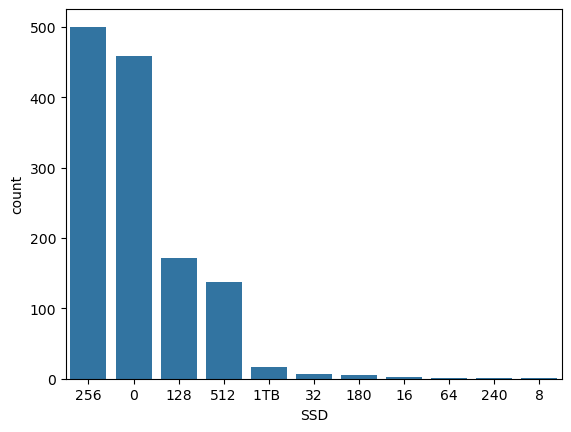

In [631]:
sns.barplot(df['SSD'].value_counts())

<Axes: xlabel='HDD', ylabel='count'>

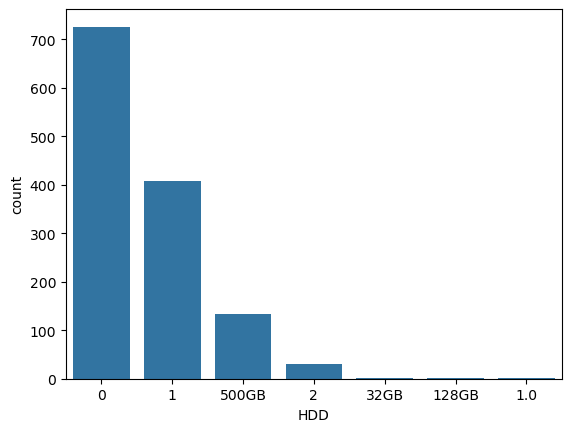

In [632]:
sns.barplot(df['HDD'].value_counts())


In [633]:
df['SSD'] = df['SSD'].str.replace(r'1TB','1024')

<Axes: xlabel='SSD', ylabel='count'>

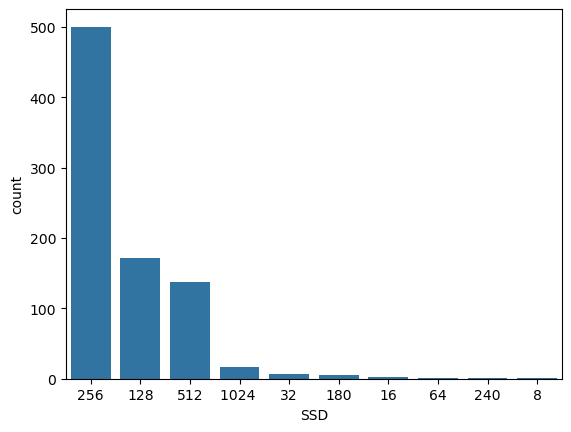

In [634]:
sns.barplot(df['SSD'].value_counts())

In [635]:
df['HDD'] = df['HDD'].str.replace(r'500GB','500')
df['HDD'] = df['HDD'].str.replace(r'32GB','32')
df['HDD'] = df['HDD'].str.replace(r'128GB','128')

<Axes: xlabel='HDD', ylabel='count'>

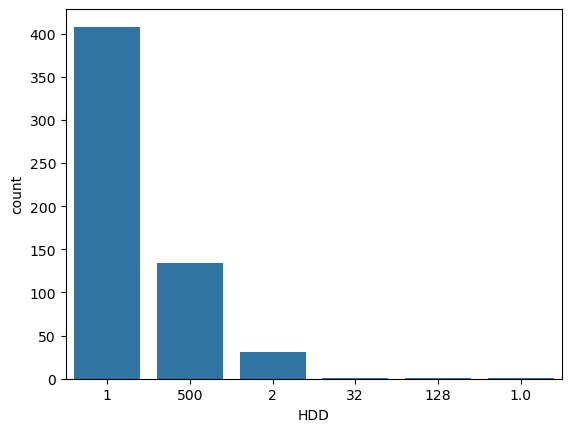

In [636]:
sns.barplot(df['HDD'].value_counts())

In [637]:
df['SSD'] = df['SSD'].str.replace(r'NaN','0')
df['HDD'] = df['HDD'].str.replace(r'NaN','0')


In [638]:
df['SSD']=df['SSD'].astype('float64')
df['HDD']=df['HDD'].astype('float64')

In [639]:
df.drop(columns=['Flash'],inplace=True)

In [640]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Gpu          1302 non-null   object 
 4   OpSys        1302 non-null   object 
 5   Weight       1302 non-null   float32
 6   Price        1302 non-null   float64
 7   Touchscreen  1302 non-null   int64  
 8   Ips          1302 non-null   int64  
 9   X_res        1302 non-null   int32  
 10  Y_res        1302 non-null   int32  
 11  ppi          1302 non-null   float64
 12  Cpu brand    1302 non-null   object 
 13  SSD          843 non-null    float64
 14  HDD          576 non-null    float64
 15  Hybrid       1302 non-null   object 
dtypes: float32(1), float64(4), int32(3), int64(2), object(6)
memory usage: 142.5+ KB


In [641]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
Nvidia GeForce 960M          1
Name: count, Length: 109, dtype: int64

In [642]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [643]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [644]:
df=df[df['Gpu brand'] != 'ARM']

In [645]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

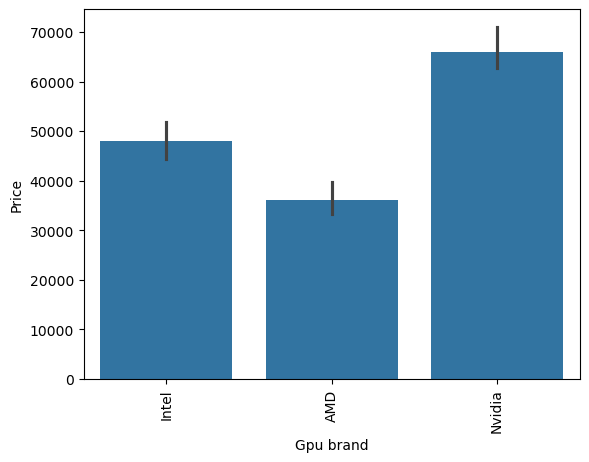

In [646]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [647]:
df.drop(columns=['Gpu'],inplace=True)

In [648]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi,Cpu brand,SSD,HDD,Hybrid,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,128.0,NaN,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,NaN,NaN,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,256.0,NaN,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,512.0,NaN,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,256.0,NaN,0,Intel


In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   OpSys        1302 non-null   object 
 4   Weight       1302 non-null   float32
 5   Price        1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   Ips          1302 non-null   int64  
 8   X_res        1302 non-null   int32  
 9   Y_res        1302 non-null   int32  
 10  ppi          1302 non-null   float64
 11  Cpu brand    1302 non-null   object 
 12  SSD          843 non-null    float64
 13  HDD          576 non-null    float64
 14  Hybrid       1302 non-null   object 
 15  Gpu brand    1302 non-null   object 
dtypes: float32(1), float64(4), int32(3), int64(2), object(6)
memory usage: 142.5+ KB


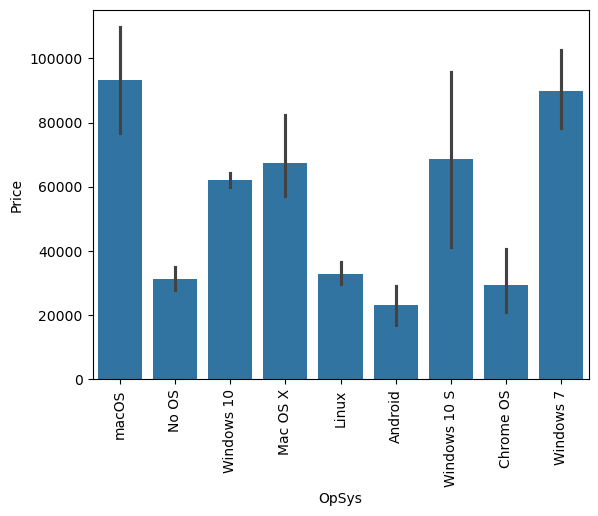

In [650]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [651]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
    
df['os'] = df['OpSys'].apply(cat_os)    

In [652]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi,Cpu brand,SSD,HDD,Hybrid,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,128.0,NaN,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,NaN,NaN,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,256.0,NaN,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,512.0,NaN,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,256.0,NaN,0,Intel,Mac


In [653]:
df.drop(columns=['OpSys'],inplace=True)

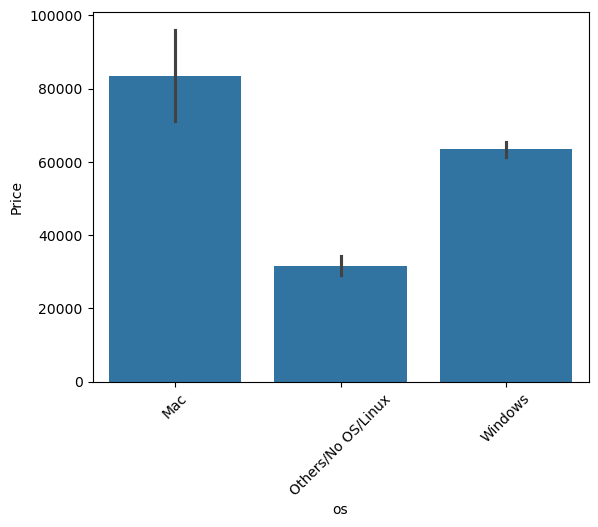

In [654]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation=45)
plt.show()

/var/folders/c9/8t42c60d22d2m1m_z6lc5_z00000gn/T/ipykernel_1535/1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

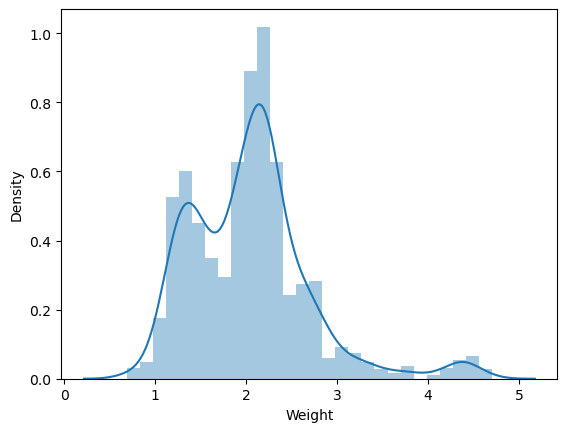

In [655]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

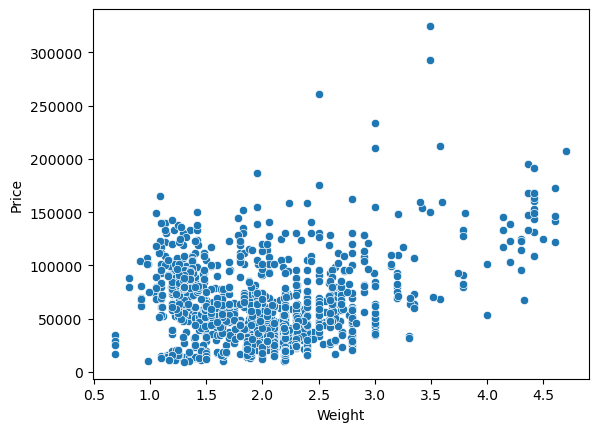

In [656]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

/var/folders/c9/8t42c60d22d2m1m_z6lc5_z00000gn/T/ipykernel_1535/3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

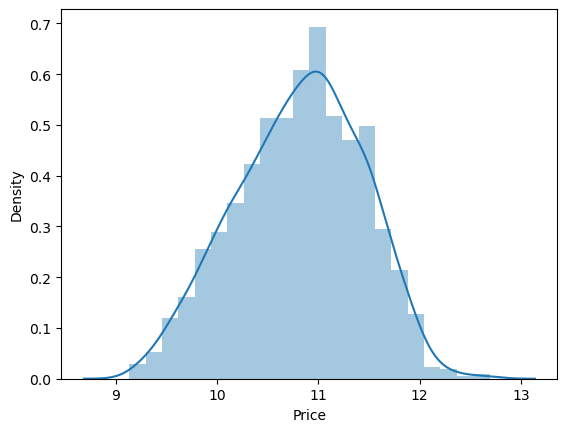

In [657]:
sns.distplot(np.log(df['Price']))

In [658]:
df['Hybrid'] = df['Hybrid'].str.replace(r'NaN','0')
df['Hybrid'] = df['Hybrid'].str.replace(r'1.0TB','1024')

<Axes: ylabel='Hybrid'>

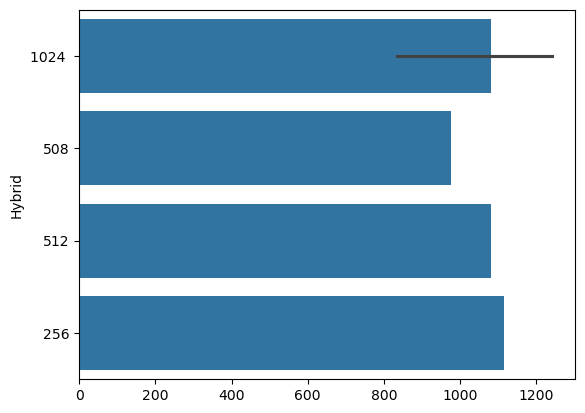

In [659]:
sns.barplot(df['Hybrid'])

In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   Ips          1302 non-null   int64  
 7   X_res        1302 non-null   int32  
 8   Y_res        1302 non-null   int32  
 9   ppi          1302 non-null   float64
 10  Cpu brand    1302 non-null   object 
 11  SSD          843 non-null    float64
 12  HDD          576 non-null    float64
 13  Hybrid       12 non-null     object 
 14  Gpu brand    1302 non-null   object 
 15  os           1302 non-null   object 
dtypes: float32(1), float64(4), int32(3), int64(2), object(6)
memory usage: 142.5+ KB


In [661]:
df['Hybrid'] = df['Hybrid'].astype('float64')

In [662]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse_output=False,drop='first')

en_arr= encoder.fit_transform(df[['Company', 'TypeName', 'Cpu brand','Gpu brand','os']])

encoded_df = pd.DataFrame(en_arr, columns=encoder.get_feature_names_out(['Company', 'TypeName', 'Cpu brand','Gpu brand','os']))

df = pd.concat([df.drop(['Company', 'TypeName', 'Cpu brand','Gpu brand','os'], axis=1), encoded_df], axis=1)


In [663]:
df.head()
df['Hybrid'] = df['Hybrid'].replace(r'NaN','0')
df['SSD'] = df['SSD'].replace(r'NaN','0')
df['HDD'] = df['HDD'].replace(r'NaN','0')
df['Price'] = df['Price'].replace(r'NaN','0')

In [664]:
df['Price'] = pd.to_numeric(df['Price'])
df['Price'].isna().sum()


0

In [665]:
df['Price'] = df['Price'] .replace("?", np.nan)

In [666]:
df['Price'].isna().sum()

0

In [667]:
df['Price'].fillna(np.mean(df['Price']))

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1297     33992.6400
1298     79866.7200
1299     12201.1200
1300     40705.9200
1301     19660.3200
Name: Price, Length: 1302, dtype: float64

In [668]:
df['Price'].isna().sum()

0

In [669]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])


In [670]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [671]:
X_train.head()

,Ram,Weight,Touchscreen,Ips,X_res,Y_res,ppi,SSD,HDD,Hybrid,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
183,8,2.00,0,0,1366,768,100.454670,128.0,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1141,8,2.40,0,0,1920,1080,141.211998,128.0,1.0,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1049,4,1.20,0,0,1366,768,135.094211,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1020,4,2.08,1,1,1920,1080,141.211998,NaN,1.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
878,4,2.18,0,0,1920,1080,141.211998,128.0,1.0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [672]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error

In [673]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,7,10,11])
# ],remainder='passthrough')

# step2 = RandomForestRegressor()

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

In [674]:
model = RandomForestRegressor(n_estimators=400,max_depth=50,min_samples_leaf=1,min_samples_split=5,max_features='sqrt',bootstrap=False)
model.fit(X_train,y_train)


RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_split=5, n_estimators=400)

In [675]:
y_pred= model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9090660659373233
MAE 0.14389231925823998


In [676]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ram                              1302 non-null   int32  
 1   Weight                           1302 non-null   float32
 2   Price                            1302 non-null   float64
 3   Touchscreen                      1302 non-null   int64  
 4   Ips                              1302 non-null   int64  
 5   X_res                            1302 non-null   int32  
 6   Y_res                            1302 non-null   int32  
 7   ppi                              1302 non-null   float64
 8   SSD                              843 non-null    float64
 9   HDD                              576 non-null    float64
 10  Hybrid                           12 non-null     float64
 11  Company_Apple                    1302 non-null   float64
 12  Company_Asus        

In [677]:
import pickle

pickle.dump(df,open('/Users/bhumeshpanchal/Documents/Bhumesh/Mtech/Python_learn/laptop-price-predictor-regression-project-main/df_new.pkl','wb'))
pickle.dump(model,open('/Users/bhumeshpanchal/Documents/Bhumesh/Mtech/Python_learn/laptop-price-predictor-regression-project-main/model_new.pkl','wb'))